In [1]:
print("Phan Đức An - 6351071001")

Phan Đức An - 6351071001


## Bước 1: Chuẩn bị các thư viện cần thiết

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

print("Đã import các thư viện thành công!")

Đã import các thư viện thành công!


## Bước 2: Download dữ liệu có sẵn trong thư viện sklearn

In [3]:
# The digits dataset
digits = datasets.load_digits()

print("Thông tin về dữ liệu MNIST digits:")
print(f"Số lượng mẫu: {len(digits.images)}")
print(f"Kích thước hình ảnh: {digits.images[0].shape}")
print(f"Số lượng lớp (classes): {len(set(digits.target))}")
print(f"\nCác lớp: {sorted(set(digits.target))}")

Thông tin về dữ liệu MNIST digits:
Số lượng mẫu: 1797
Kích thước hình ảnh: (8, 8)
Số lượng lớp (classes): 10

Các lớp: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


## Bước 3: Biểu diễn 4 mẫu dữ liệu huấn luyện tương ứng với 4 lớp 0, 1, 2, 3

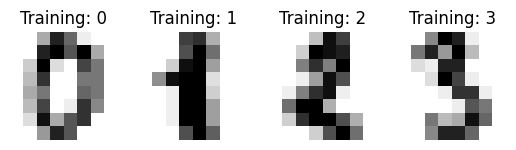

In [4]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset. If we were working from image files, we could load them using
# matplotlib.pyplot.imread. Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))

for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

plt.show()

## Bước 4: Chuyển đổi mỗi đối tượng hình ảnh - ma trận 8x8 thành ma trận 1x64 để thỏa yêu cầu đầu vào của thuật toán

In [5]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(f"Số lượng mẫu: {n_samples}")
print(f"Kích thước dữ liệu ban đầu (8x8): {digits.images[0].shape}")
print(f"Kích thước dữ liệu sau khi reshape (1x64): {data[0].shape}")
print(f"\nShape của toàn bộ dữ liệu: {data.shape}")
print(f"(samples={data.shape[0]}, features={data.shape[1]})")

Số lượng mẫu: 1797
Kích thước dữ liệu ban đầu (8x8): (8, 8)
Kích thước dữ liệu sau khi reshape (1x64): (64,)

Shape của toàn bộ dữ liệu: (1797, 64)
(samples=1797, features=64)


In [6]:
# Hiển thị mẫu dữ liệu sau khi reshape
print("\nMẫu hình ảnh đầu tiên (ma trận 8x8):")
print(digits.images[0])
print(f"\nLabel: {digits.target[0]}")

print("\n" + "="*80)
print("Ma trận sau khi reshape thành 1x64:")
print(data[0])
print("="*80)


Mẫu hình ảnh đầu tiên (ma trận 8x8):
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Label: 0

Ma trận sau khi reshape thành 1x64:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


## Bước 5: Sử dụng thuật toán cây ID3

In [7]:
# Create a classifier: a decision tree classifier
classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=33)

## Bước 6: Chia dữ liệu thành hai phần: huấn luyện 80%, kiểm thử 20%

In [8]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

print(f"Kích thước tập huấn luyện: {len(X_train)} mẫu ({len(X_train)/n_samples*100:.1f}%)")
print(f"Kích thước tập kiểm thử: {len(X_test)} mẫu ({len(X_test)/n_samples*100:.1f}%)")
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Kích thước tập huấn luyện: 1437 mẫu (80.0%)
Kích thước tập kiểm thử: 360 mẫu (20.0%)

X_train shape: (1437, 64)
X_test shape: (360, 64)
y_train shape: (1437,)
y_test shape: (360,)


## Bước 7: Tiến hành xây dựng cây ID3

In [9]:
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

print("Mô hình cây ID3 đã được huấn luyện thành công!")
print(f"Độ sâu của cây: {classifier.get_depth()}")
print(f"Số lượng lá: {classifier.get_n_leaves()}")
print(f"Số lượng features: {classifier.n_features_in_}")

Mô hình cây ID3 đã được huấn luyện thành công!
Độ sâu của cây: 10
Số lượng lá: 113
Số lượng features: 64


In [10]:
# Thông số của Decision Tree
print("\nThông số chi tiết của mô hình:")
print(f"Criterion: {classifier.criterion}")
print(f"Splitter: {classifier.splitter}")
print(f"Max depth: {classifier.max_depth}")
print(f"Min samples split: {classifier.min_samples_split}")
print(f"Min samples leaf: {classifier.min_samples_leaf}")
print(f"Random state: {classifier.random_state}")


Thông số chi tiết của mô hình:
Criterion: entropy
Splitter: best
Max depth: None
Min samples split: 2
Min samples leaf: 1
Random state: 33


## Bước 8: Dự đoán nhận dữ liệu cho tập kiểm thử

In [11]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

print(f"Số lượng dự đoán: {len(predicted)}")
print(f"\n10 dự đoán đầu tiên: {predicted[:10]}")
print(f"10 giá trị thực tế đầu tiên: {y_test[:10]}")

Số lượng dự đoán: 360

10 dự đoán đầu tiên: [2 3 4 5 6 7 8 9 0 9]
10 giá trị thực tế đầu tiên: [2 3 4 5 6 7 8 9 0 9]


## Bước 9: Biểu diễn một vài kết quả dự đoán

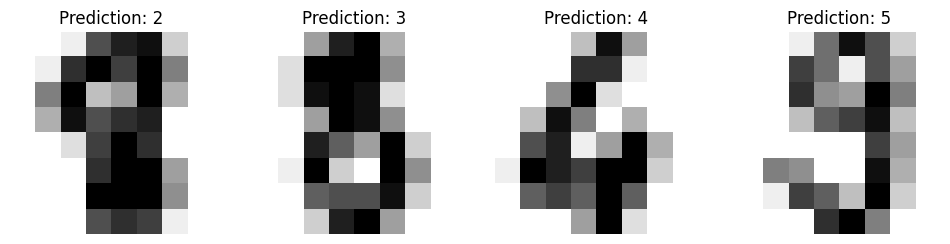

In [12]:
_, axes = plt.subplots(1, 4, figsize=(12, 4))
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

plt.show()

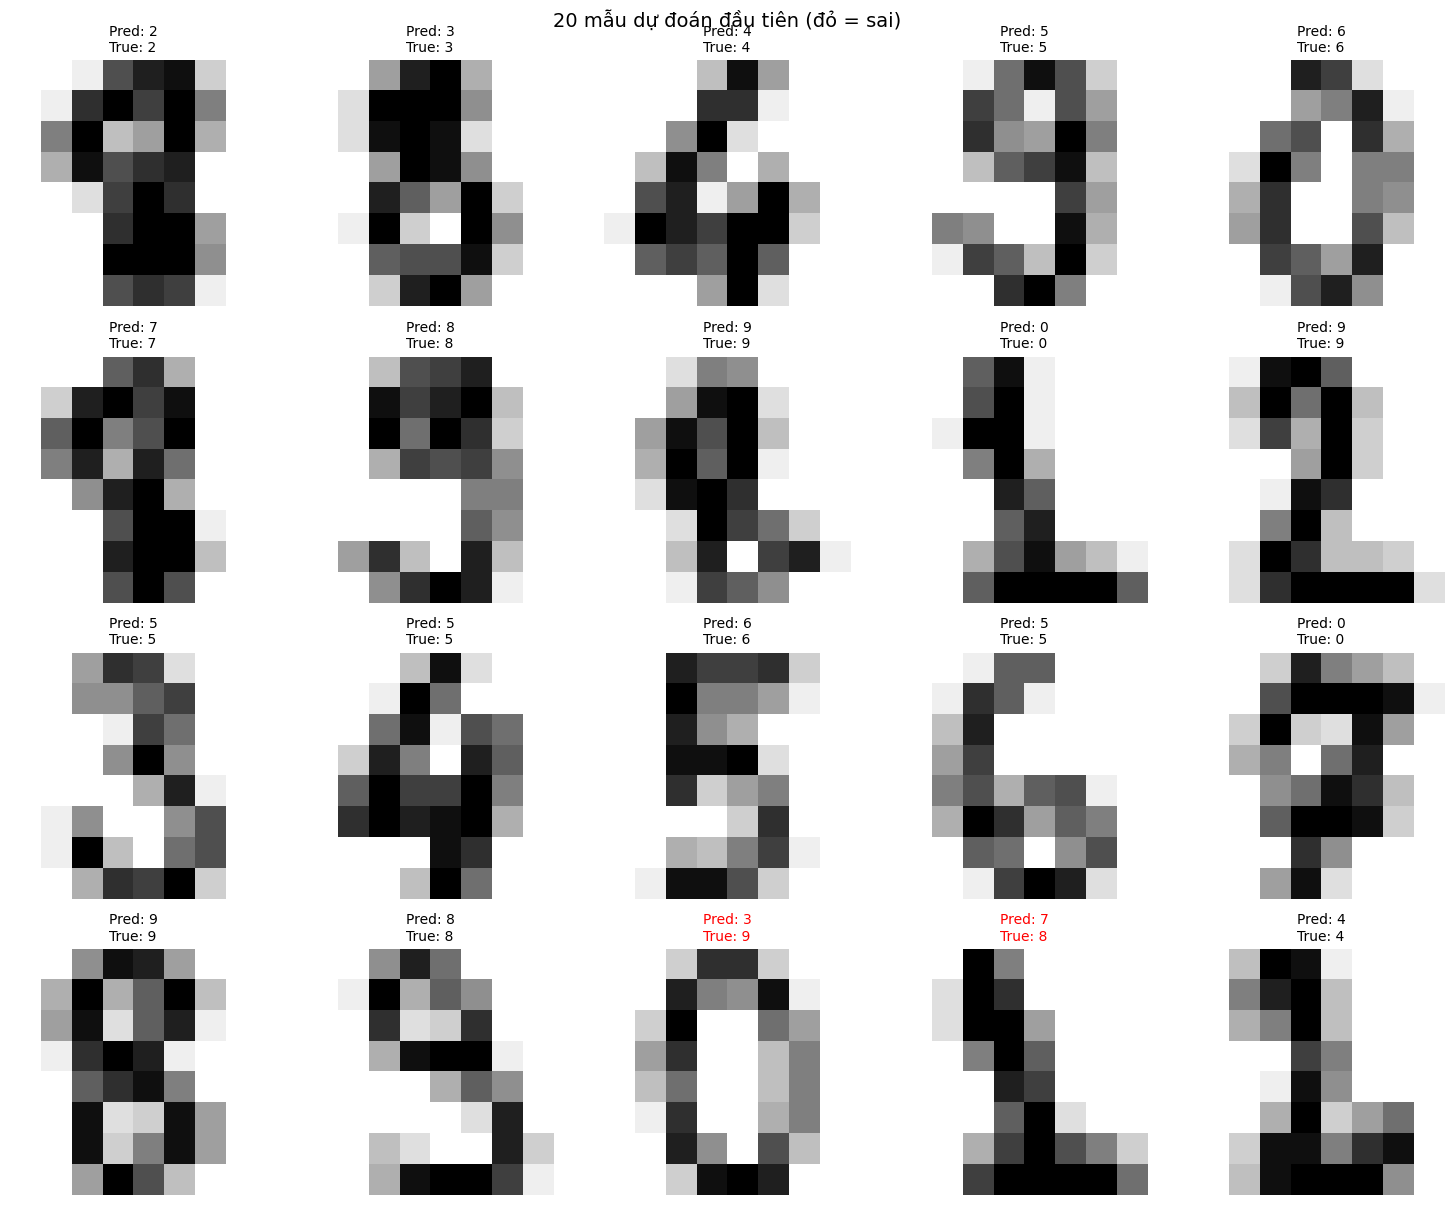

In [13]:
# Hiển thị nhiều kết quả hơn
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.ravel()

for i in range(20):
    axes[i].imshow(digits.images[n_samples // 2 + i], cmap=plt.cm.gray_r, interpolation='nearest')
    axes[i].set_title(f'Pred: {predicted[i]}\nTrue: {y_test[i]}', fontsize=10)
    axes[i].axis('off')
    
    # Đánh dấu màu đỏ nếu dự đoán sai
    if predicted[i] != y_test[i]:
        axes[i].set_title(f'Pred: {predicted[i]}\nTrue: {y_test[i]}', fontsize=10, color='red')

plt.tight_layout()
plt.suptitle('20 mẫu dự đoán đầu tiên (đỏ = sai)', fontsize=14, y=1.00)
plt.show()

## Bước 10: Thống số đạt được của cây ID3

In [14]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360




In [15]:
# Tính toán accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)
print(f"\nĐộ chính xác (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")

# Tính số lượng dự đoán đúng và sai
correct = (predicted == y_test).sum()
incorrect = (predicted != y_test).sum()
print(f"\nSố dự đoán đúng: {correct}/{len(y_test)}")
print(f"Số dự đoán sai: {incorrect}/{len(y_test)}")


Độ chính xác (Accuracy): 0.7972 (79.72%)

Số dự đoán đúng: 287/360
Số dự đoán sai: 73/360


## Bước 11: Ma trận nhầm lẫn

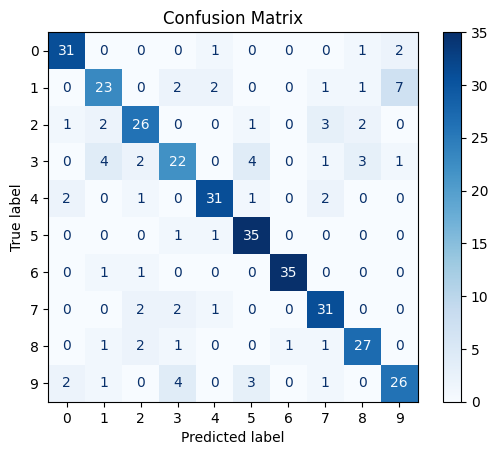

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    classifier, 
    X_test, 
    y_test,
    cmap="Blues"
)

plt.title("Confusion Matrix")
plt.show()


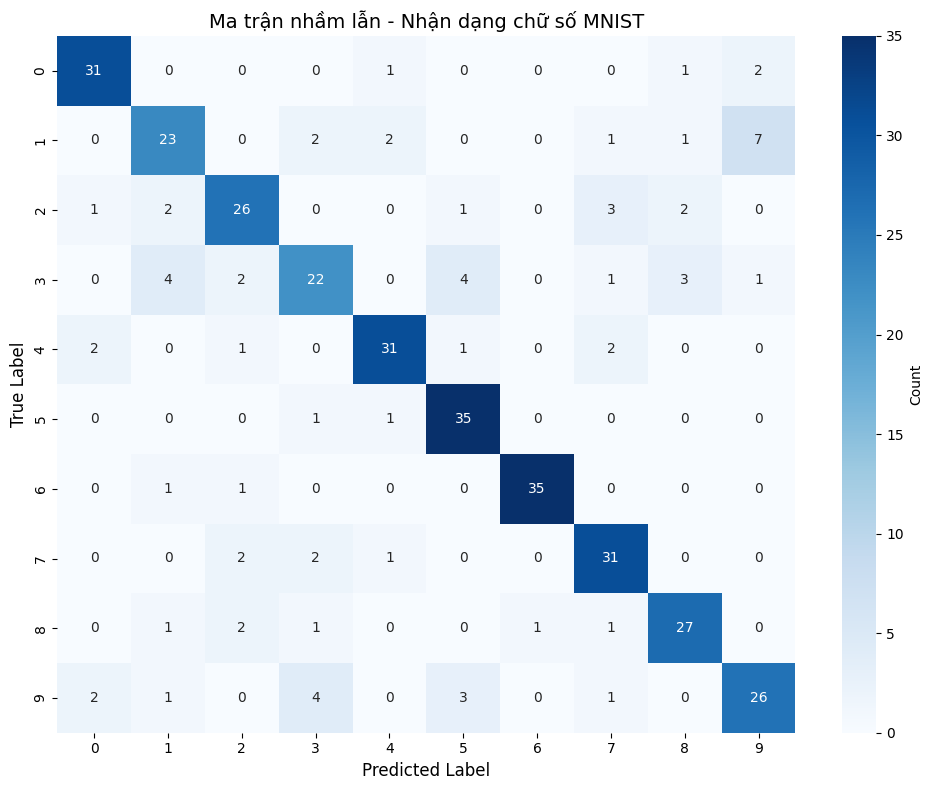


Ma trận nhầm lẫn:
[[31  0  0  0  1  0  0  0  1  2]
 [ 0 23  0  2  2  0  0  1  1  7]
 [ 1  2 26  0  0  1  0  3  2  0]
 [ 0  4  2 22  0  4  0  1  3  1]
 [ 2  0  1  0 31  1  0  2  0  0]
 [ 0  0  0  1  1 35  0  0  0  0]
 [ 0  1  1  0  0  0 35  0  0  0]
 [ 0  0  2  2  1  0  0 31  0  0]
 [ 0  1  2  1  0  0  1  1 27  0]
 [ 2  1  0  4  0  3  0  1  0 26]]


In [19]:
# Vẽ confusion matrix với seaborn (đẹp hơn)
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - Nhận dạng chữ số MNIST', fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nMa trận nhầm lẫn:")
print(cm)

In [20]:
# Phân tích lỗi phân loại theo từng chữ số
print("\nPHÂN TÍCH LỖI PHÂN LOẠI THEO TỪNG CHỮ SỐ:")
print("="*80)

for digit in range(10):
    # Số lượng mẫu thực tế của chữ số này
    total_samples = (y_test == digit).sum()
    # Số lượng dự đoán đúng
    correct_predictions = ((y_test == digit) & (predicted == digit)).sum()
    # Accuracy cho chữ số này
    digit_accuracy = correct_predictions / total_samples if total_samples > 0 else 0
    
    print(f"Chữ số {digit}: {correct_predictions}/{total_samples} đúng ({digit_accuracy*100:.2f}%)")
    
    # Các lỗi phân loại phổ biến
    errors = y_test[(y_test == digit) & (predicted != digit)]
    if len(errors) > 0:
        misclassified = predicted[(y_test == digit) & (predicted != digit)]
        from collections import Counter
        error_counts = Counter(misclassified)
        print(f"  Hay bị nhầm thành: {dict(error_counts)}")

print("="*80)


PHÂN TÍCH LỖI PHÂN LOẠI THEO TỪNG CHỮ SỐ:
Chữ số 0: 31/35 đúng (88.57%)
  Hay bị nhầm thành: {np.int64(8): 1, np.int64(9): 2, np.int64(4): 1}
Chữ số 1: 23/36 đúng (63.89%)
  Hay bị nhầm thành: {np.int64(9): 7, np.int64(3): 2, np.int64(4): 2, np.int64(8): 1, np.int64(7): 1}
Chữ số 2: 26/35 đúng (74.29%)
  Hay bị nhầm thành: {np.int64(7): 3, np.int64(0): 1, np.int64(1): 2, np.int64(8): 2, np.int64(5): 1}
Chữ số 3: 22/37 đúng (59.46%)
  Hay bị nhầm thành: {np.int64(2): 2, np.int64(1): 4, np.int64(5): 4, np.int64(8): 3, np.int64(7): 1, np.int64(9): 1}
Chữ số 4: 31/37 đúng (83.78%)
  Hay bị nhầm thành: {np.int64(0): 2, np.int64(7): 2, np.int64(2): 1, np.int64(5): 1}
Chữ số 5: 35/37 đúng (94.59%)
  Hay bị nhầm thành: {np.int64(4): 1, np.int64(3): 1}
Chữ số 6: 35/37 đúng (94.59%)
  Hay bị nhầm thành: {np.int64(1): 1, np.int64(2): 1}
Chữ số 7: 31/36 đúng (86.11%)
  Hay bị nhầm thành: {np.int64(4): 1, np.int64(2): 2, np.int64(3): 2}
Chữ số 8: 27/33 đúng (81.82%)
  Hay bị nhầm thành: {np.int64(